In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("marketing_campaign.csv", sep='\t')
df = dataset.copy()
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


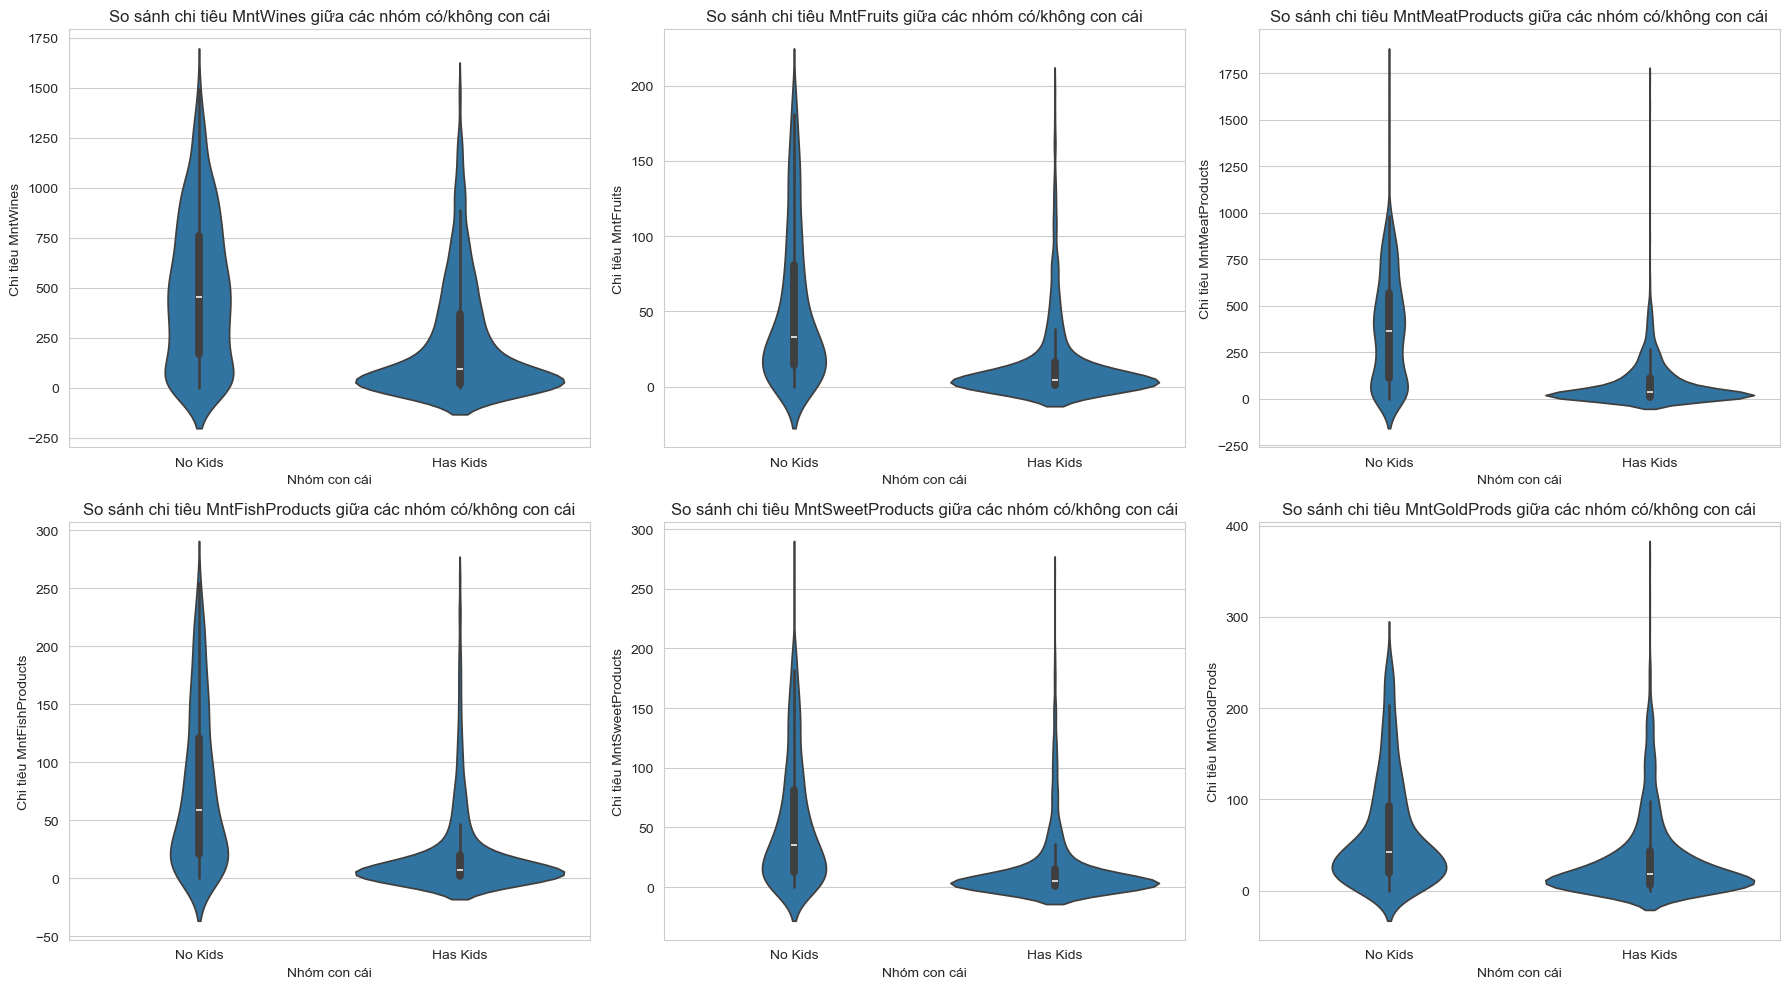

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo cột mới 'Kidhome_Group' dựa trên Kidhome và Teenhome
df['Kidhome_Group'] = df[['Kidhome', 'Teenhome']].apply(lambda x: 'No Kids' if x.sum() == 0 else 'Has Kids', axis=1)

# Danh sách các cột sản phẩm
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Thiết lập giao diện seaborn
sns.set_style('whitegrid')

# Tạo figure với lưới subplot (2 hàng, 3 cột cho 6 sản phẩm)
plt.figure(figsize=(18, 10))

# Vẽ violin plot cho từng cột sản phẩm
for i, col in enumerate(product_cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='Kidhome_Group', y=col, data=df, order=['No Kids', 'Has Kids'])
    plt.title(f'So sánh chi tiêu {col} giữa các nhóm có/không con cái')
    plt.xlabel('Nhóm con cái')
    plt.ylabel(f'Chi tiêu {col}')

# Đảm bảo layout gọn gàng
plt.tight_layout()
plt.show()

# bảng trên cho ta thấy những người không có con cái (No Kids) thường chi tiêu nhiều hơn cho các sản phẩm như rượu vang (MntWines), trái cây (MntFruits), thịt (MntMeatProducts), cá (MntFishProducts), đồ ngọt (MntSweetProducts) và vàng (MntGoldProds) so với những người có con cái (Has Kids). Điều này có thể phản ánh rằng những người không có con cái có thể có nhiều thu nhập khả dụng hơn để chi tiêu vào các mặt hàng này, trong khi những người có con cái có thể phải ưu tiên chi tiêu cho các nhu cầu khác liên quan đến việc nuôi dưỡng con cái.

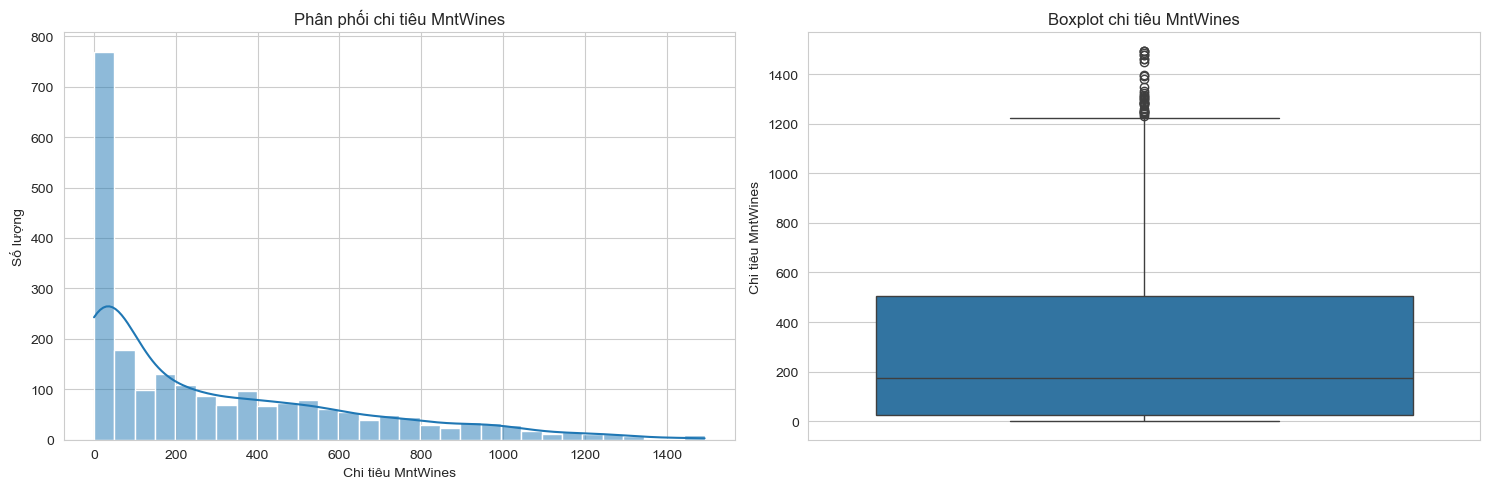

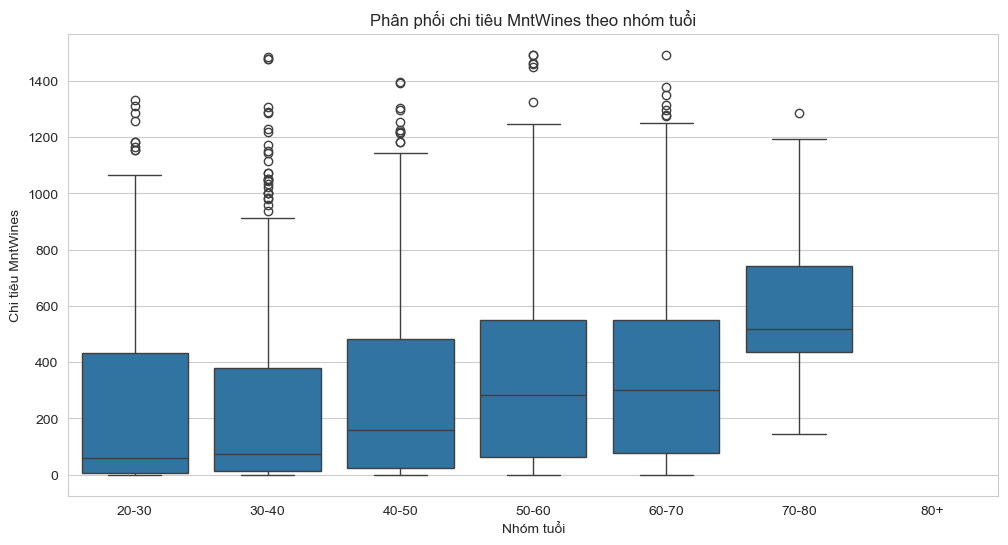

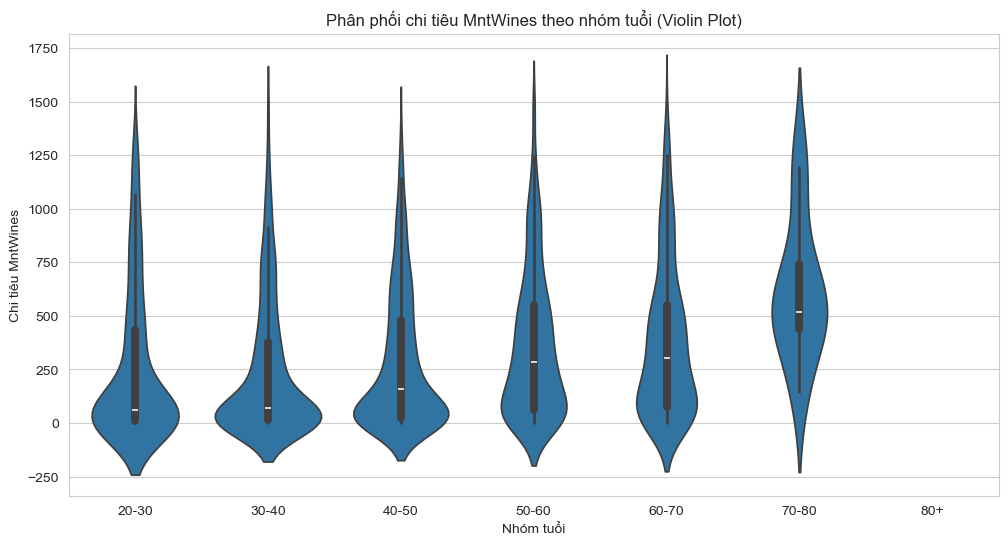

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dữ liệu
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Tính tuổi (Age) từ Year_Birth (dựa trên năm hiện tại 2000)
df['Age'] = 2014 - df['Year_Birth']

# Thiết lập giao diện seaborn
sns.set_style('whitegrid')



# 2. Phân phối MntWines theo nhóm tuổi (Age)
# Chia Age thành các nhóm tuổi
bins = [20, 30, 40, 50, 60, 70, 80, 100]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Vẽ boxplot của MntWines theo nhóm tuổi
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Group', y='MntWines', data=df)
plt.title('Phân phối chi tiêu MntWines theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Chi tiêu MntWines')
plt.show()

# Vẽ violin plot để xem phân phối chi tiết hơn
plt.figure(figsize=(12, 6))
sns.violinplot(x='Age_Group', y='MntWines', data=df)
plt.title('Phân phối chi tiêu MntWines theo nhóm tuổi (Violin Plot)')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Chi tiêu MntWines')
plt.show()

# biểu đồ trên cho ta thấy rằng chi tiêu MntWines có xu hướng tăng dần khi tuổi tuổi lên. Điều này phản ánh rằng người trẻ tuổi có xu hướng chi tiêu phấp hơn cho rượu vang so với người lớn tuổi, có thể do lối sống và sở thích khác nhau giữa các nhóm tuổi.

C:\Users\ThaiTu\AppData\Local\Temp\ipykernel_18692\548220189.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


Hệ số tương quan giữa Income và các cột chi tiêu:
MntWines            0.576903
MntFruits           0.428791
MntMeatProducts     0.577805
MntFishProducts     0.437564
MntSweetProducts    0.436131
MntGoldProds        0.321938
Name: Income, dtype: float64


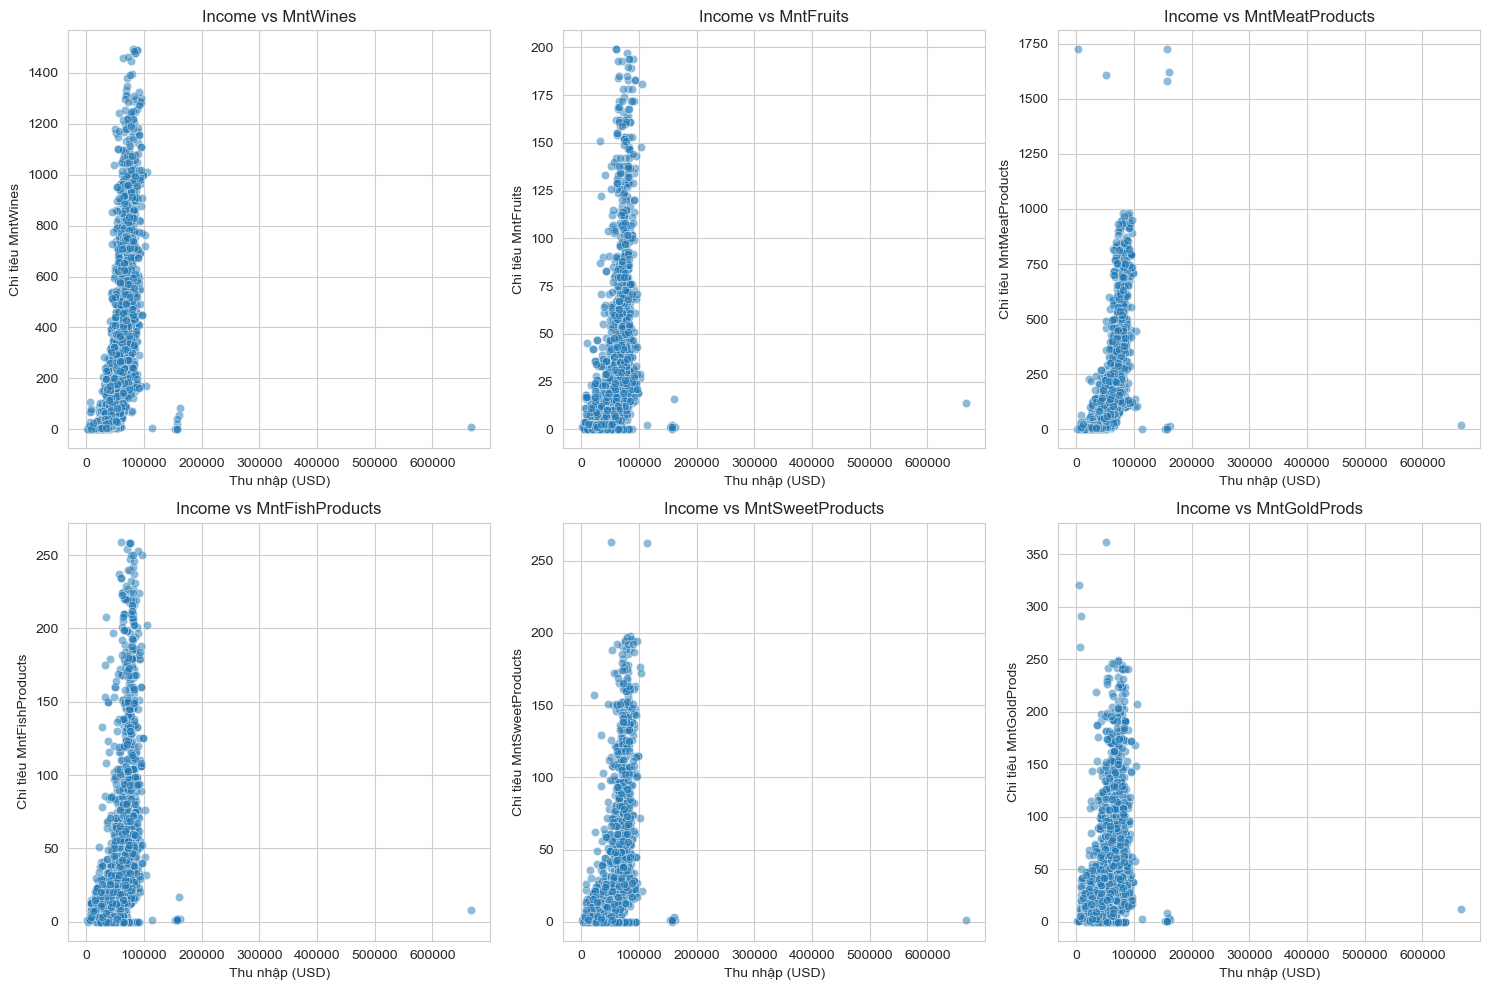

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dữ liệu
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Xử lý giá trị thiếu trong Income (điền bằng median)
df['Income'].fillna(df['Income'].median(), inplace=True)

# Danh sách các cột sản phẩm
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Thiết lập giao diện seaborn
sns.set_style('whitegrid')

# 1. Tính hệ số tương quan
print("Hệ số tương quan giữa Income và các cột chi tiêu:")
correlation = df[['Income'] + product_cols].corr()['Income'][1:]  # Lấy tương quan của Income với các cột sản phẩm
print(correlation)

# 2. Vẽ scatter plot cho Income vs mỗi cột sản phẩm
plt.figure(figsize=(15, 10))
for i, col in enumerate(product_cols, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x='Income', y=col, data=df, alpha=0.5)
    plt.title(f'Income vs {col}')
    plt.xlabel('Thu nhập (USD)')
    plt.ylabel(f'Chi tiêu {col}')
plt.tight_layout()
plt.show()

# biểu đồ trên cho ta thấy rằng những người có thu nhập cao hơn thường có xu hướng chi tiêu nhiều hơn cho các sản phẩm như rượu vang (MntWines), trái cây (MntFruits), thịt (MntMeatProducts), cá (MntFishProducts), đồ ngọt (MntSweetProducts) và vàng (MntGoldProds). Hệ số tương quan dương giữa Income và các cột chi tiêu này cho thấy mối quan hệ tích cực, nghĩa là khi thu nhập tăng, chi tiêu cho các sản phẩm này cũng có xu hướng tăng theo. Điều này phản ánh rằng những người có thu nhập cao hơn có khả năng chi tiêu nhiều hơn cho các mặt hàng không thiết yếu và cao cấp.

C:\Users\ThaiTu\AppData\Local\Temp\ipykernel_18692\1373456305.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


Hệ số tương quan giữa Income và các cột kênh mua sắm:
NumWebPurchases        0.380554
NumCatalogPurchases    0.586826
NumStorePurchases      0.526600
NumWebVisitsMonth     -0.549785
Name: Income, dtype: float64


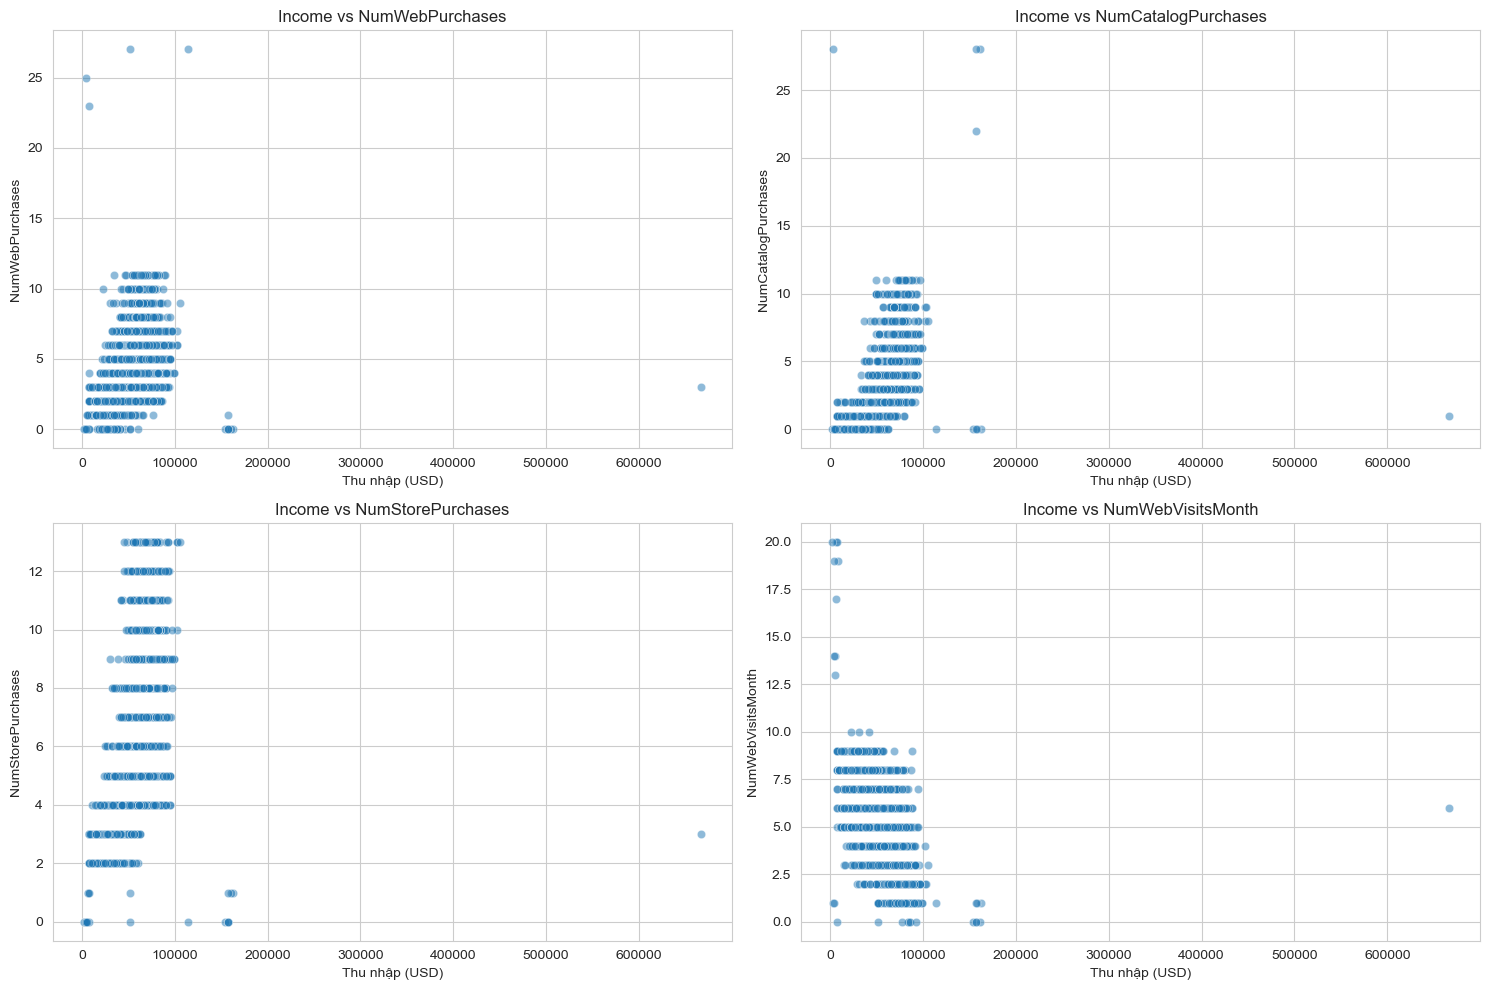

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dữ liệu
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Xử lý giá trị thiếu trong Income (điền bằng median)
df['Income'].fillna(df['Income'].median(), inplace=True)

# Danh sách các cột kênh mua sắm
channel_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Thiết lập giao diện seaborn
sns.set_style('whitegrid')

# 1. Tính hệ số tương quan
print("Hệ số tương quan giữa Income và các cột kênh mua sắm:")
correlation = df[['Income'] + channel_cols].corr()['Income'][1:]  # Lấy tương quan của Income với các cột kênh
print(correlation)

# 2. Vẽ scatter plot cho Income vs mỗi cột kênh mua sắm
plt.figure(figsize=(15, 10))
for i, col in enumerate(channel_cols, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x='Income', y=col, data=df, alpha=0.5)
    plt.title(f'Income vs {col}')
    plt.xlabel('Thu nhập (USD)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# biểu đồ trên cho ta thấy rằng có một mối tương quan dương nhẹ giữa thu nhập (Income) và số lần mua hàng qua web (NumWebPurchases) cũng như số lần mua hàng qua catalog (NumCatalogPurchases). Điều này cho thấy rằng những người có thu nhập cao hơn có xu hướng mua sắm trực tuyến nhiều hơn. Tuy nhiên, mối tương quan này không quá mạnh, cho thấy rằng còn nhiều yếu tố khác ảnh hưởng đến hành vi mua sắm trực tuyến ngoài thu nhập cá nhân. Số lần mua hàng tại cửa hàng (NumStorePurchases) và số lần truy cập web hàng tháng (NumWebVisitsMonth) không cho thấy mối tương quan rõ ràng với thu nhập, điều này có thể do các yếu tố khác như thói quen mua sắm truyền thống hoặc sự tiện lợi của việc mua sắm tại cửa hàng vật lý.

Các giá trị duy nhất trong Marital_Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Tóm tắt thống kê các cột chi tiêu theo Marital_Status:

MntWines:
                count        mean         std  min    25%    50%     75%  \
Marital_Status                                                             
Divorced        232.0  324.844828  347.097304  0.0  23.00  182.5  565.75   
Married         864.0  299.480324  337.982007  0.0  23.00  173.0  483.00   
Single          487.0  288.106776  331.490705  0.0  20.00  154.0  479.50   
Together        580.0  306.825862  334.562564  0.0  25.75  183.5  505.00   
Widow            77.0  369.272727  333.919059  1.0  67.00  332.0  544.00   

                   max  
Marital_Status          
Divorced        1459.0  
Married         1493.0  
Single          1332.0  
Together        1492.0  
Widow           1462.0  

MntFruits:
 

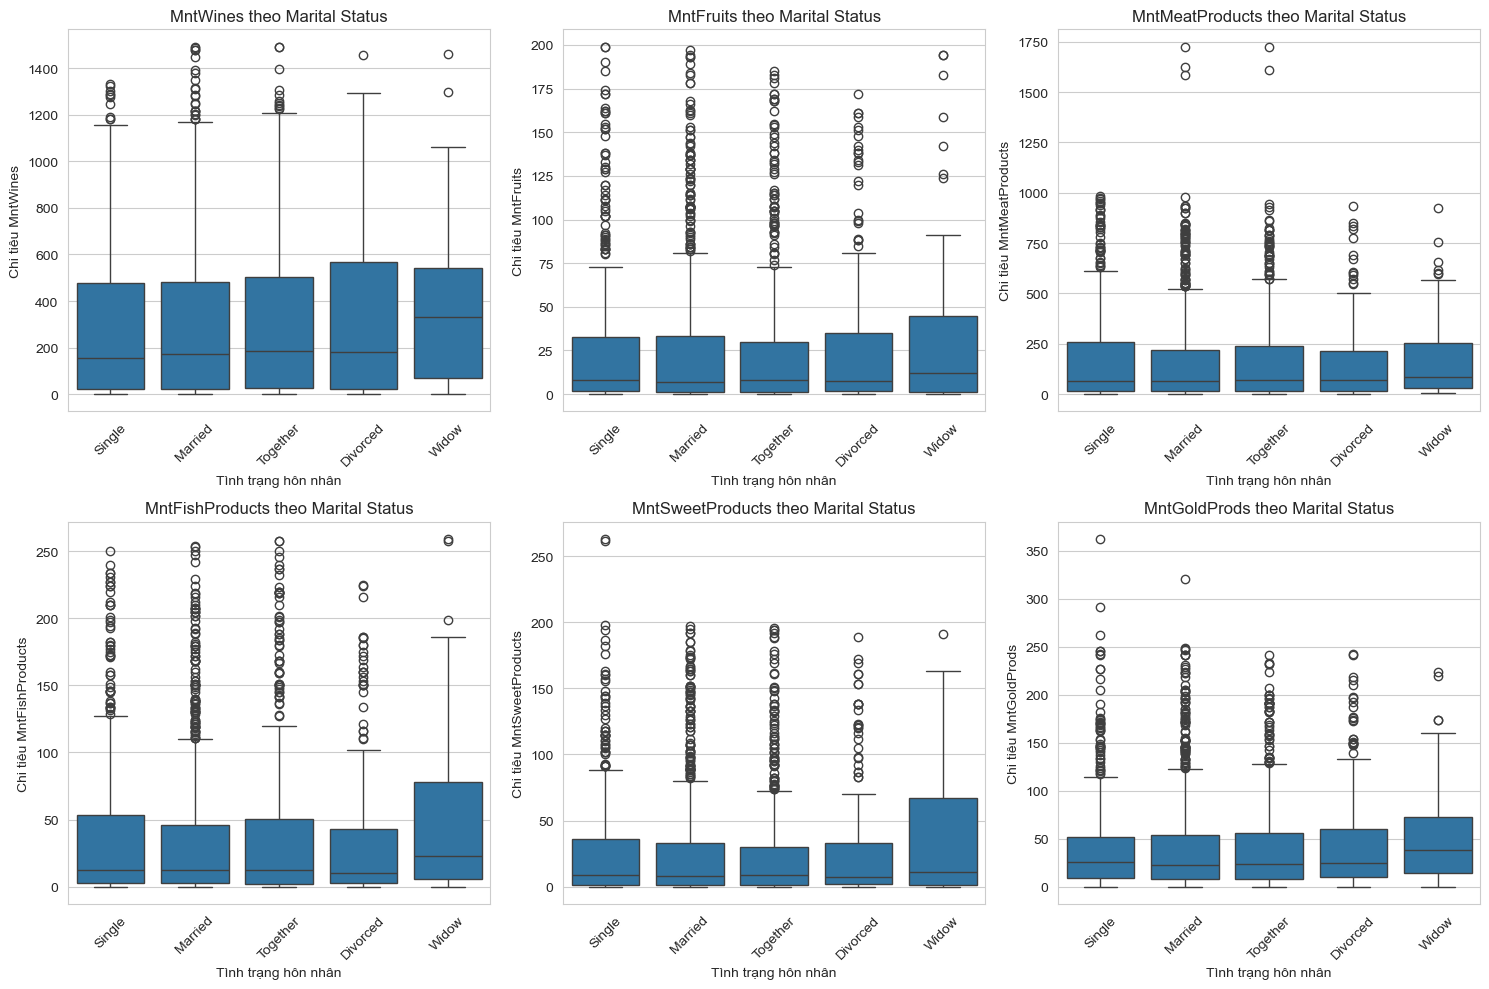

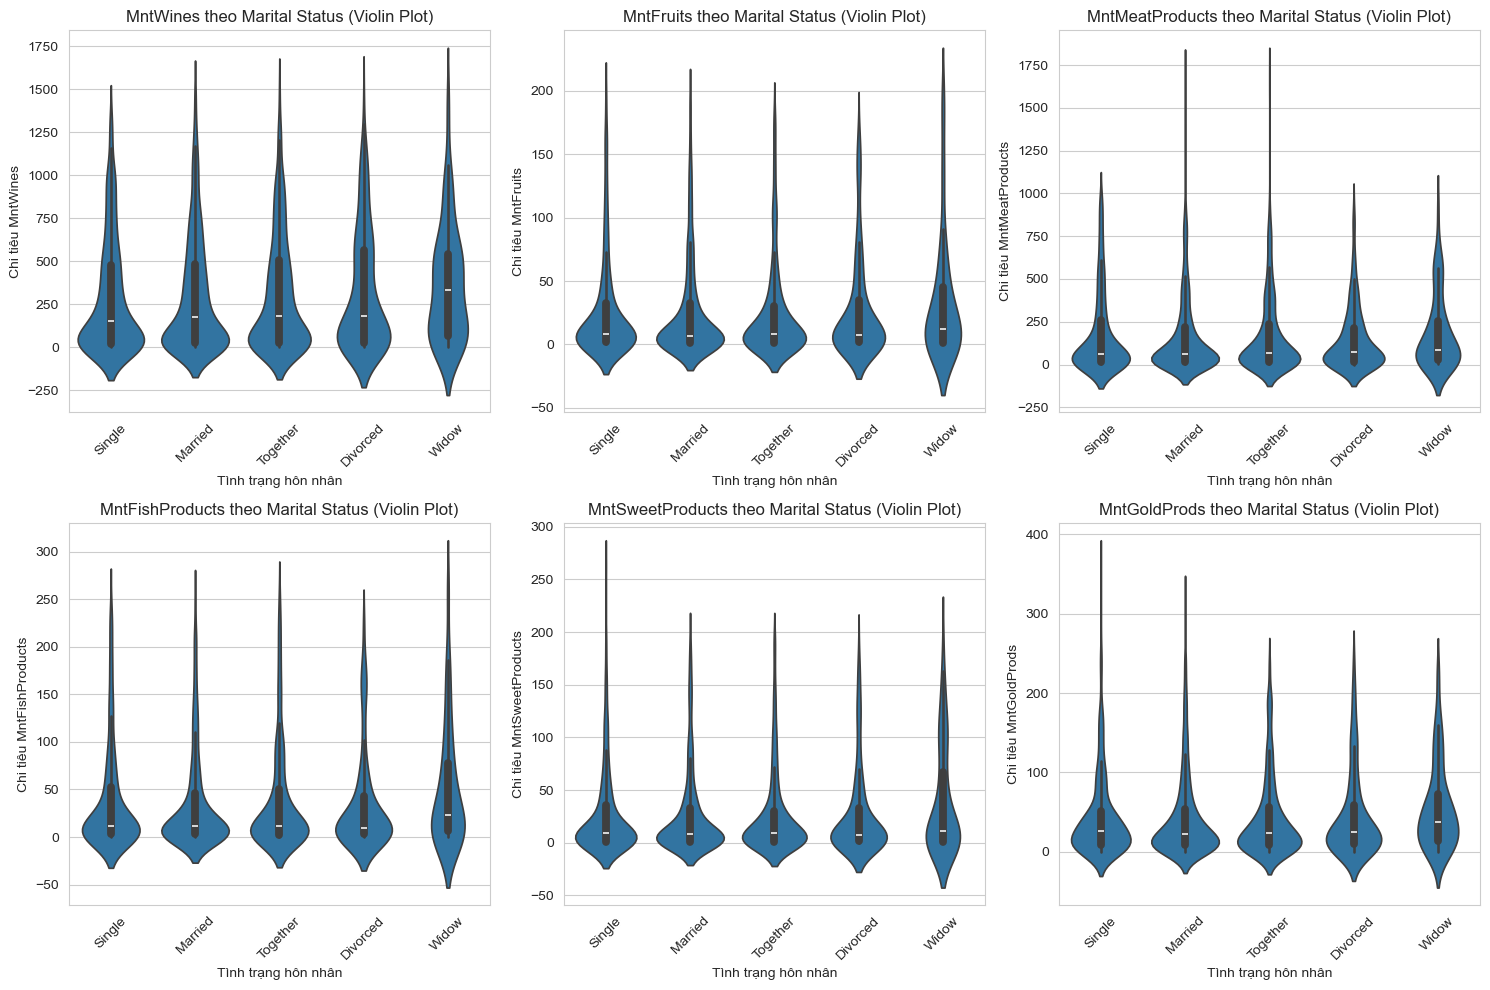

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dữ liệu
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Kiểm tra các giá trị duy nhất của Marital_Status
print("Các giá trị duy nhất trong Marital_Status:")
print(df['Marital_Status'].value_counts())

# Loại bỏ hoặc gộp các nhóm nhỏ (Alone, Absurd, YOLO) vào 'Single' để phân tích rõ ràng hơn
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')

# Danh sách các cột sản phẩm
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Thiết lập giao diện seaborn
sns.set_style('whitegrid')

# 1. Tóm tắt thống kê các cột chi tiêu theo Marital_Status
print("\nTóm tắt thống kê các cột chi tiêu theo Marital_Status:")
for col in product_cols:
    print(f"\n{col}:")
    print(df.groupby('Marital_Status')[col].describe())

# 2. Vẽ boxplot cho mỗi cột sản phẩm theo Marital_Status
plt.figure(figsize=(15, 10))
for i, col in enumerate(product_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Marital_Status', y=col, data=df, order=['Single', 'Married', 'Together', 'Divorced', 'Widow'])
    plt.title(f'{col} theo Marital Status')
    plt.xlabel('Tình trạng hôn nhân')
    plt.ylabel(f'Chi tiêu {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Vẽ violin plot cho mỗi cột sản phẩm theo Marital_Status
plt.figure(figsize=(15, 10))
for i, col in enumerate(product_cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='Marital_Status', y=col, data=df, order=['Single', 'Married', 'Together', 'Divorced', 'Widow'])
    plt.title(f'{col} theo Marital Status (Violin Plot)')
    plt.xlabel('Tình trạng hôn nhân')
    plt.ylabel(f'Chi tiêu {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# biểu đồ trên cho ta thấy những người ly hôn có xung hướng chi nhiều tiền cho rượu hơn, và nhưng người già có xung hướng chi tiêu nhiều cho các sản phẩm điều này phản ánh thường thì người già sẽ là người hay đi mua sắp cho gia đình, còn người trẻ bận công việc sẽ ít đi mua sắp

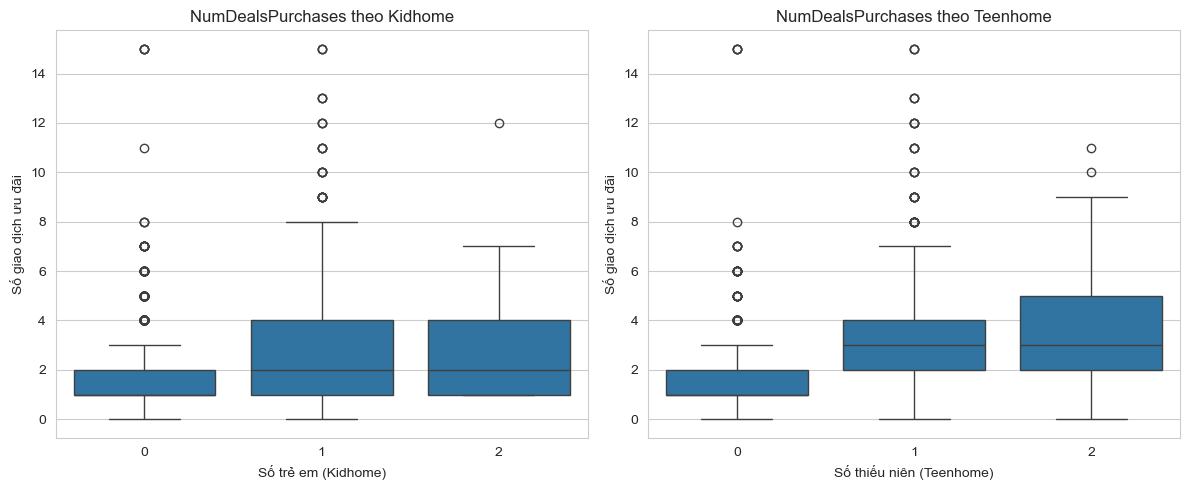

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('marketing_campaign.csv', sep='\t')
sns.set_style('whitegrid')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Kidhome', y='NumDealsPurchases', data=df)
plt.title('NumDealsPurchases theo Kidhome')
plt.xlabel('Số trẻ em (Kidhome)')
plt.ylabel('Số giao dịch ưu đãi')

plt.subplot(1, 2, 2)
sns.boxplot(x='Teenhome', y='NumDealsPurchases', data=df)
plt.title('NumDealsPurchases theo Teenhome')
plt.xlabel('Số thiếu niên (Teenhome)')
plt.ylabel('Số giao dịch ưu đãi')
plt.tight_layout()
plt.show()

# biểu đồ trên cho ta thấy rằng cả số trẻ em (Kidhome) và số thiếu niên (Teenhome) đều có ảnh hưởng đến số lượng giao dịch ưu đãi (NumDealsPurchases). Cụ thể, những người có nhiều trẻ em hoặc thiếu niên thường có xu hướng thực hiện nhiều giao dịch ưu đãi hơn. Điều này có thể phản ánh rằng các gia đình có con cái thường tìm kiếm các ưu đãi và khuyến mãi để tiết kiệm chi phí mua sắm, đặc biệt khi họ phải chi tiêu cho nhiều thành viên trong gia đình.

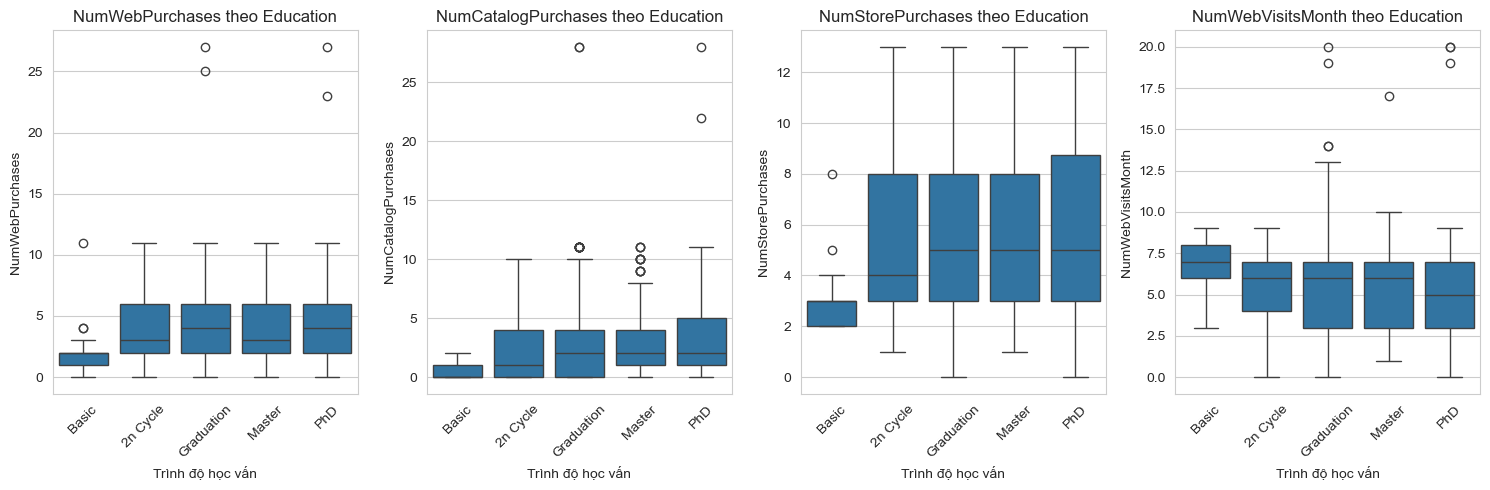

In [ ]:
channel_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

plt.figure(figsize=(15, 5))
for i, col in enumerate(channel_cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x='Education', y=col, data=df, order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'])
    plt.title(f'{col} theo Education')
    plt.xlabel('Trình độ học vấn')
    plt.ylabel(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# biểu đồ trên cho ta thấy rằng những người có trình độ học vấn cao hơn (Master, PhD) thường có xu hướng mua sắm trực tuyến nhiều hơn, đặc biệt là qua web (NumWebPurchases) và catalog (NumCatalogPurchases). Điều này có thể phản ánh rằng những người có trình độ học vấn cao hơn thường có thu nhập cao hơn và có xu hướng sử dụng các kênh mua sắm hiện đại hơn. Ngược lại, những người có trình độ học vấn thấp hơn (Basic, 2n Cycle) có xu hướng mua sắm tại cửa hàng vật lý (NumStorePurchases) nhiều hơn. Số lần truy cập web hàng tháng (NumWebVisitsMonth) cũng tăng dần theo trình độ học vấn, cho thấy rằng những người có trình độ học vấn cao hơn thường sử dụng internet nhiều hơn trong cuộc sống hàng ngày của họ.